### BUSINESS PROBLEM UNSERSTANDING

### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
The company requires to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None) 

###### Data loading 

In [2]:
lead = pd.read_csv('Leads.csv')

In [3]:
lead.sample()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
3517,8fcfd8b7-f112-4958-ae58-81adfef42609,626816,Landing Page Submission,Google,Yes,No,0,3.0,337,3.0,Email Bounced,India,Retail Management,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Mumbai,NaN,NaN,NaN,NaN,No,No,Email Bounced


In [4]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [6]:
lead.shape

(9240, 37)

In [7]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# Columns with Null values 

features_with_na=[features for features in lead.columns if lead[features].isnull().sum()>1]
features_with_na

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [11]:
# Numerical 

numerical_features =[feature for feature in lead.columns if lead[feature].dtypes !='O']
print('number of numerical variables :',len(numerical_features))
lead[numerical_features].head() 


number of numerical variables : 7


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,660737,0,0.0,0,0.0,15.0,15.0
1,660728,0,5.0,674,2.5,15.0,15.0
2,660727,1,2.0,1532,2.0,14.0,20.0
3,660719,0,1.0,305,1.0,13.0,17.0
4,660681,1,2.0,1428,1.0,15.0,18.0


In [12]:
# Discerte 

discrete_features = [feature for feature in numerical_features if len(lead[feature].unique())<25 and feature not in  ['Prospect ID']]  
print('discrete variables count {}'.format(len(discrete_features)))
lead[discrete_features].head()

discrete variables count 3


,Converted,Asymmetrique Activity Score,Asymmetrique Profile Score
0,0,15.0,15.0
1,0,15.0,15.0
2,1,14.0,20.0
3,0,13.0,17.0
4,1,15.0,18.0


In [13]:
# Categorical 

categorical_features=[feature for feature in lead.columns if lead[feature].dtypes=='O']
categorical_features

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [14]:
# Finding the percentage of null values 

percent_missing=round(100*lead.isnull().sum()/len(lead.index),2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

######  Exploratory Data Analysis 

In [15]:
lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

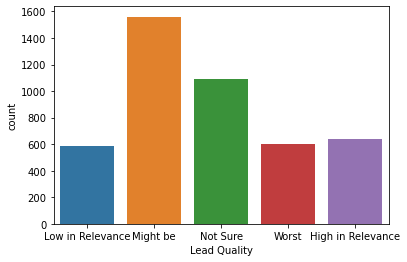

In [16]:
sns.countplot(lead['Lead Quality'])
plt.show()

In [17]:
lead['Page Views Per Visit'].dtypes

dtype('float64')

In [18]:
floats = [feature for feature in lead.columns if lead[feature].dtypes=='float64']
from scipy import stats
z =np.abs(stats.zscore(lead[floats]))
print(z)

      TotalVisits  Page Views Per Visit  Asymmetrique Activity Score  \
0             NaN                   NaN                          NaN   
1             NaN                   NaN                          NaN   
2             NaN                   NaN                          NaN   
3             NaN                   NaN                          NaN   
4             NaN                   NaN                          NaN   
...           ...                   ...                          ...   
9235          NaN                   NaN                          NaN   
9236          NaN                   NaN                          NaN   
9237          NaN                   NaN                          NaN   
9238          NaN                   NaN                          NaN   
9239          NaN                   NaN                          NaN   

      Asymmetrique Profile Score  
0                            NaN  
1                            NaN  
2                            N

In [19]:
z.isnull().sum()

TotalVisits                    9240
Page Views Per Visit           9240
Asymmetrique Activity Score    9240
Asymmetrique Profile Score     9240
dtype: int64

In [20]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [21]:
# Replacing the select value 

lead['City']=lead['City'].replace('Select', 'Mumbai')

In [22]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


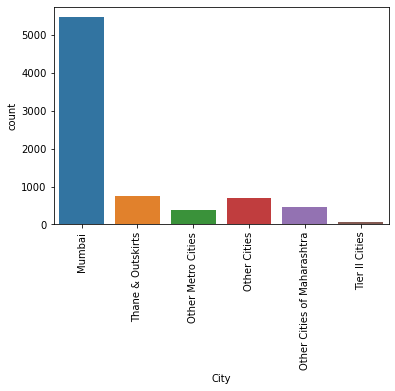

In [23]:
# Which city has the leads 

sns.countplot(lead['City'])
plt.xticks(rotation=90)
plt.show()

In [24]:
lead.sample()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
2572,3bc68d79-fd65-4d30-8a9a-4af921864cc3,634843,Landing Page Submission,Organic Search,No,No,0,5.0,124,5.0,Email Opened,India,Travel and Tourism,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,02.Medium,13.0,16.0,No,Yes,Modified


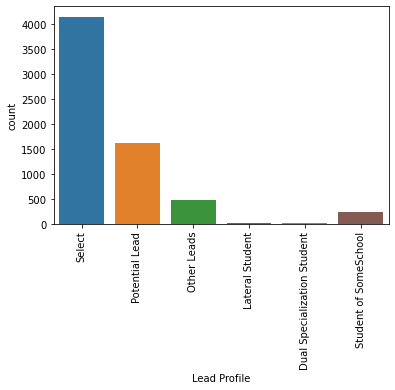

In [25]:

sns.countplot(lead['Lead Profile'])
plt.xticks(rotation=90)
plt.show()

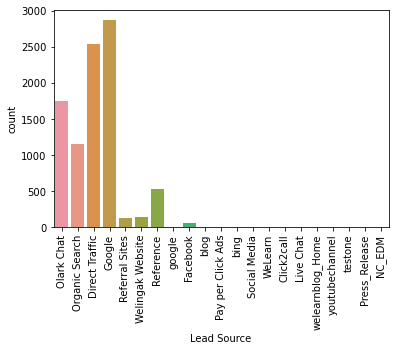

In [26]:
# Google has the highest lead attraction 

sns.countplot(lead['Lead Source'])
plt.xticks(rotation=90)
plt.show()

In [27]:
# There are so many sites with very low contribution which can be merged to one souce like'others' out of which google can be merged with 'Google'

In [28]:
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

<AxesSubplot:xlabel='Asymmetrique Activity Score', ylabel='count'>

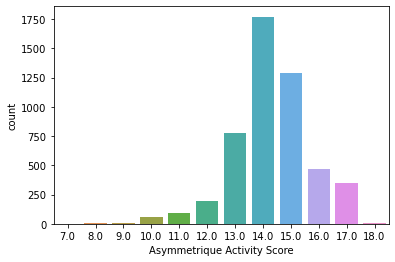

In [29]:
sns.countplot(lead['Asymmetrique Activity Score'])

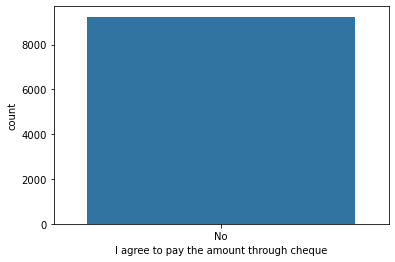

In [30]:
# No inference as no one paid with cheque

sns.countplot(lead['I agree to pay the amount through cheque'])
plt.show()

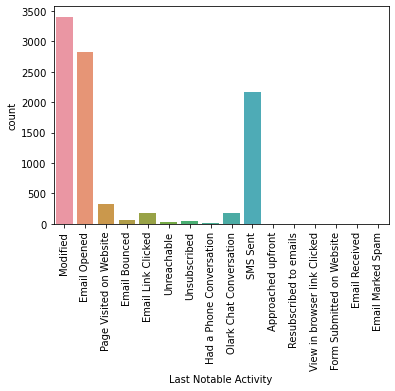

In [31]:
# Sms,emails have the highest views

sns.countplot(lead['Last Notable Activity'])
plt.xticks(rotation = 90)
plt.show()

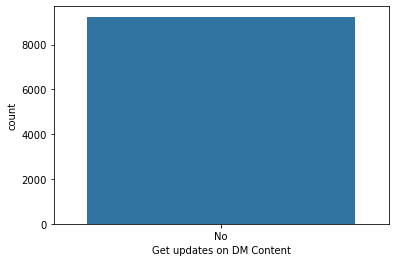

In [32]:
sns.countplot(lead['Get updates on DM Content'])
plt.show()

In [33]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


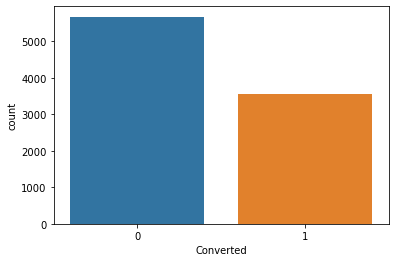

In [34]:
sns.countplot(lead['Converted'])
plt.show()

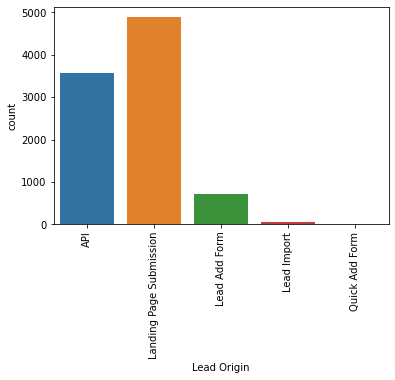

In [35]:
sns.countplot(lead['Lead Origin'])
plt.xticks(rotation=90)
plt.show()

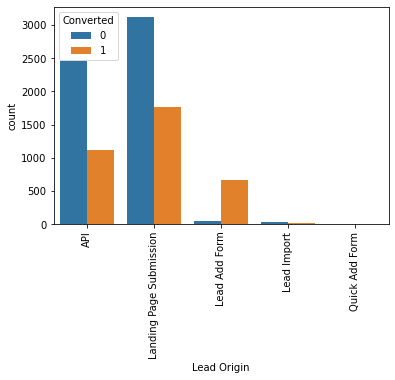

In [36]:
# Lead who landed on submission page are more like to convert to sales

sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)
plt.xticks(rotation=90)
plt.show()

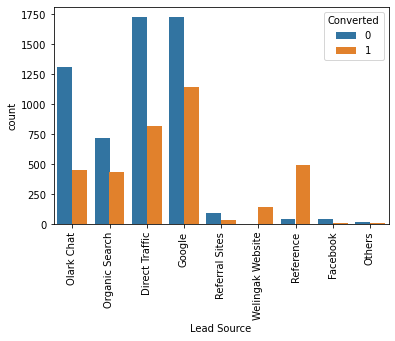

In [37]:
# Googlers are more likely to get converted

sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
plt.xticks(rotation=90)
plt.show()

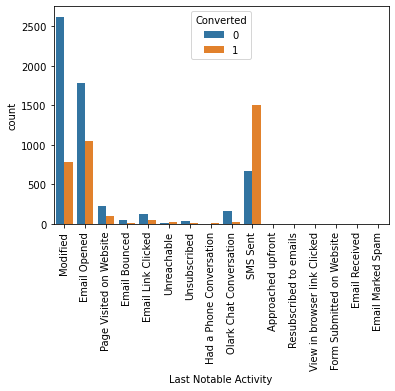

In [38]:
# Leads are more interested in mails and SMS

sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
plt.xticks(rotation=90)
plt.show()

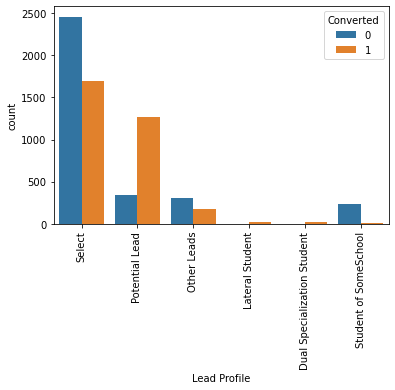

In [39]:
# Select has no inference hence was replaced to top most value

sns.countplot(x = "Lead Profile", hue = "Converted", data = lead)
plt.xticks(rotation=90)
plt.show()

In [40]:
lead['Lead Profile']=lead['Lead Profile'].replace('Select', 'Potential Lead')

In [41]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [42]:
lead['Lead Profile'].mode()

0    Potential Lead
Name: Lead Profile, dtype: object

In [43]:
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

<AxesSubplot:xlabel='Do Not Email', ylabel='count'>

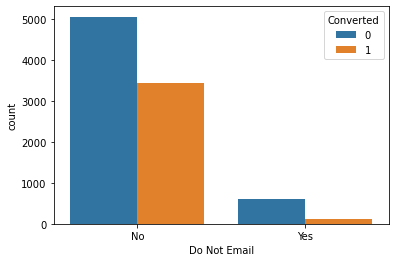

In [44]:
sns.countplot(x='Do Not Email',hue='Converted',data=lead)

In [45]:
lead['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

### OUTLIER HANDLING

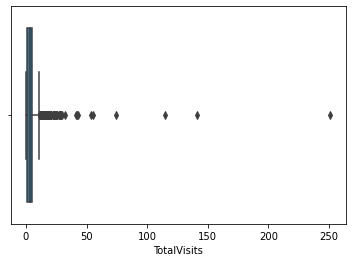

In [46]:
sns.boxplot(lead['TotalVisits'])
plt.show()

In [47]:
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

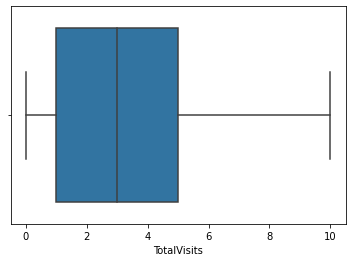

In [48]:
sns.boxplot(lead['TotalVisits'])

<AxesSubplot:xlabel='TotalVisits', ylabel='count'>

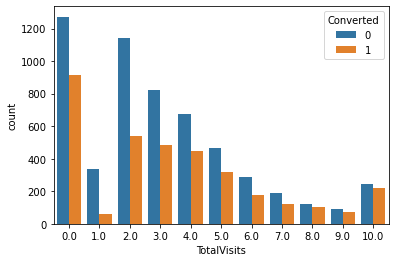

In [49]:
sns.countplot(x='TotalVisits',hue='Converted',data=lead)

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

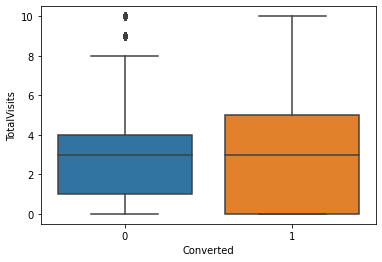

In [50]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)

In [51]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


<AxesSubplot:xlabel='Total Time Spent on Website'>

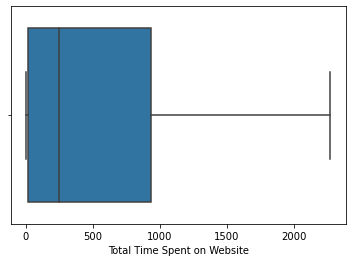

In [52]:
sns.boxplot(lead['Total Time Spent on Website'])

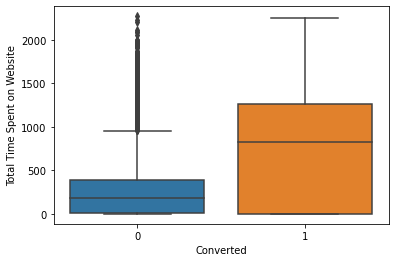

In [53]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)
plt.show()

In [54]:
lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

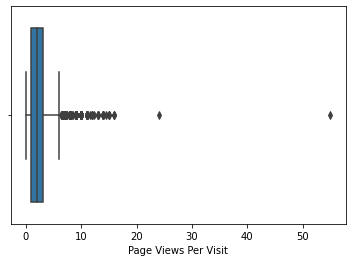

In [55]:
sns.boxplot(lead['Page Views Per Visit'])

In [56]:
percentiles = lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

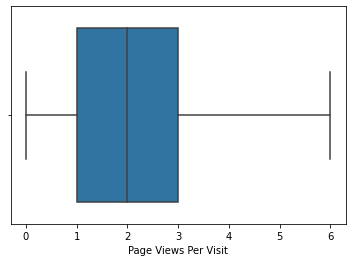

In [57]:
sns.boxplot(lead['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

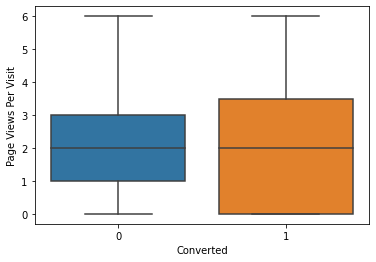

In [58]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)

In [59]:
lead['A free copy of Mastering The Interview'].describe()

count     9240
unique       2
top         No
freq      6352
Name: A free copy of Mastering The Interview, dtype: object

<AxesSubplot:xlabel='A free copy of Mastering The Interview', ylabel='count'>

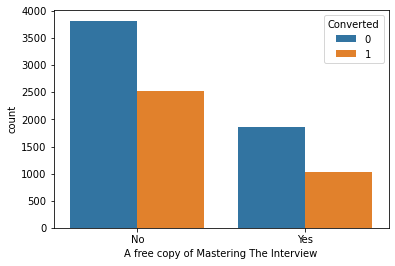

In [60]:
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=lead)

In [61]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [62]:
varlist =  ['Do Not Email', 'Do Not Call']

In [63]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [64]:
lead[varlist] = lead[varlist].apply(binary_map)

In [65]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [66]:
catlist =  ['A free copy of Mastering The Interview', 'I agree to pay the amount through cheque']

In [67]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [68]:
updates = ['Get updates on DM Content']

In [69]:
lead[updates] = lead[updates].apply(binary_map)

In [70]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,0,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,0,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,0,Potential Lead,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [71]:
lead['Get updates on DM Content'].value_counts()

0    9240
Name: Get updates on DM Content, dtype: int64

In [72]:
# As we can know the variables dropping below are irrelevant for model building 
data_drop =lead.drop(['Asymmetrique Activity Index',
                      'Asymmetrique Profile Index',
                      'Asymmetrique Activity Score',
                      'Asymmetrique Profile Score'],
                     axis = 1,
                     inplace = True)

In [73]:
data_drop=lead.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)


In [74]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,0,Potential Lead,Mumbai,No,No,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,0,Potential Lead,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,0,Potential Lead,Mumbai,No,No,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,No,Modified


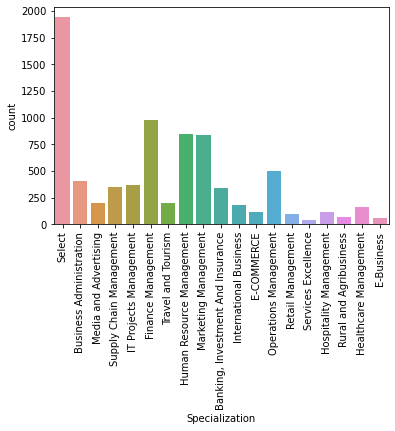

In [75]:
sns.countplot(x='Specialization',data=lead)
plt.xticks(rotation=90)
plt.show()

In [76]:
lead['Specialization'].describe()

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

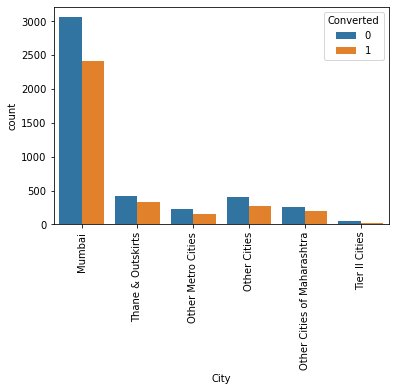

In [77]:
sns.countplot(x = "City", hue = "Converted", data = lead)
plt.xticks(rotation=90)
plt.show()

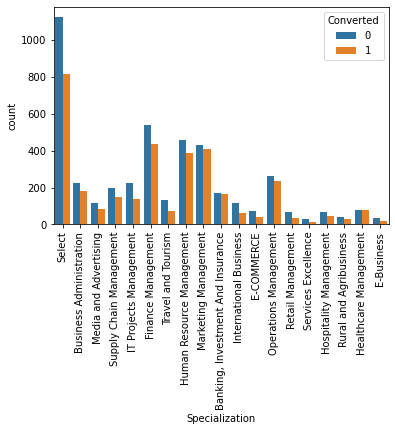

In [78]:
sns.countplot(x = "Specialization", hue = "Converted", data = lead)
plt.xticks(rotation=90)
plt.show()

In [79]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,0,Potential Lead,Mumbai,No,No,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,0,Potential Lead,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,0,Potential Lead,Mumbai,No,No,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,No,Modified


In [80]:
lead['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

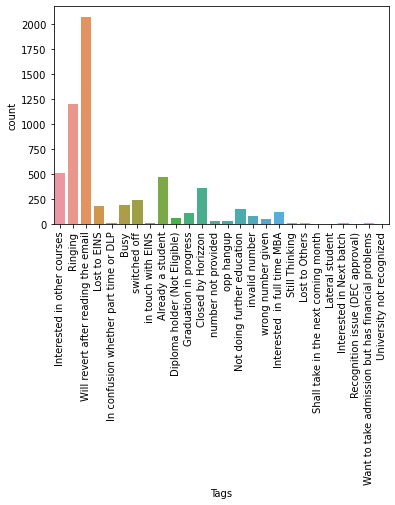

In [81]:
sns.countplot(lead['Tags'])
plt.xticks(rotation = 90)
plt.show()

In [82]:
lead['Tags'].isnull().sum()

3353

In [83]:
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

In [84]:
lead['Tags'].isnull().sum()

0

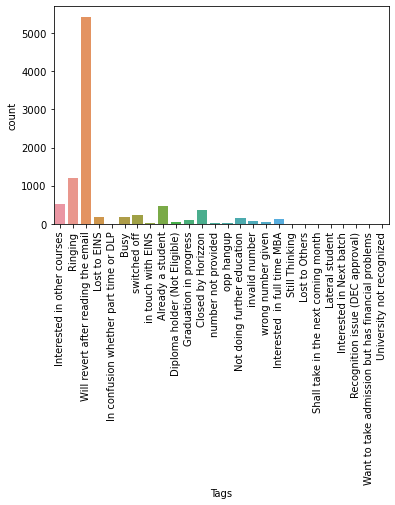

In [85]:
sns.countplot(lead['Tags'])
plt.xticks(rotation = 90)
plt.show()

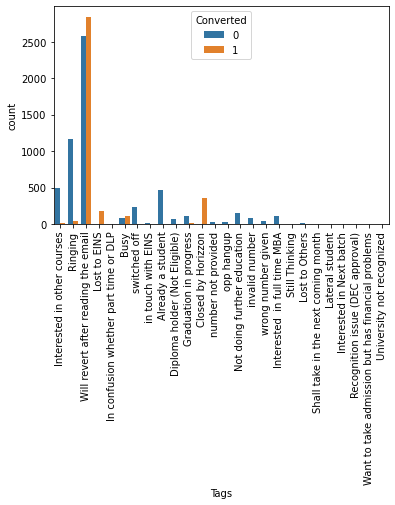

In [86]:
sns.countplot(x = "Tags", hue = "Converted", data = lead)
plt.xticks(rotation=90)
plt.show()

In [87]:
lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

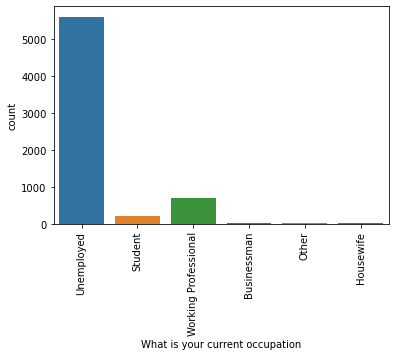

In [88]:
sns.countplot(lead['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

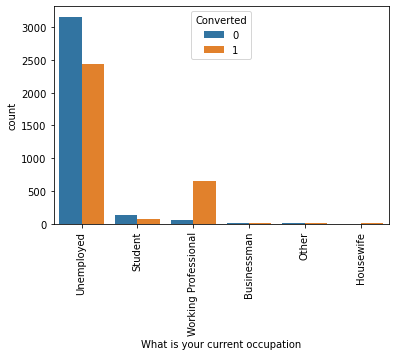

In [89]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
plt.xticks(rotation=90)
plt.show()

In [90]:
lead['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [91]:
lead['Country'] = lead['Country'].replace(np.nan, 'India')


In [92]:
lead['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [93]:
lead['Specialization'].describe()

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

In [94]:
lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [95]:
lead['Specialization'] = lead['Specialization'].replace('Select', 'Finance Management')
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Finance Management')


In [96]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,0,Potential Lead,Mumbai,No,No,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,0,Potential Lead,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,0,Potential Lead,Mumbai,No,No,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,No,Modified


In [97]:
lead['How did you hear about X Education'].describe()

count       7033
unique        10
top       Select
freq        5043
Name: How did you hear about X Education, dtype: object

In [98]:
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [99]:
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace('Select', 'Online Search ')
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].replace(np.nan, 'Online Search ')

In [100]:
lead.head()


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,0,Potential Lead,Mumbai,No,No,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,0,Potential Lead,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Online Search,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,0,Potential Lead,Mumbai,No,No,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,No,Modified


In [101]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [102]:
# It seems most of the students who searched for the course details might have given as occupation unemployed, so imputing nulls with unemployes
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed ')

In [103]:
lead['Tags'].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [104]:
# In analysis of city variable we saw most of the leads are from Mumbai so impute nulls with mumbai
lead['City']=lead['City'].replace(np.nan,'Mumbai')

In [105]:
round(lead.isnull().sum()/len(lead.index),2)*100

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                           0.0
Specialization                                    0.0
How did you hear about X Education                0.0
What is your current occupation                   0.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [106]:
# Inspecting null values now we can drop null cells with less than 1% and also more than 45% which are also insignificant in model building

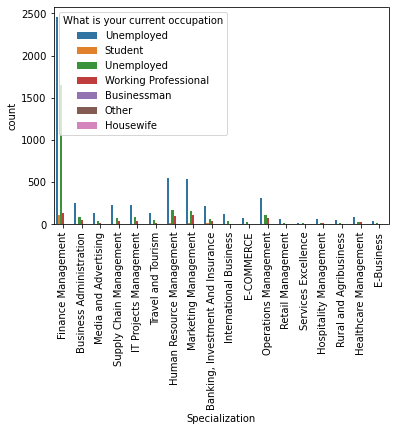

In [107]:
sns.countplot(x = "Specialization", hue = "What is your current occupation", data = lead)
plt.xticks(rotation=90)
plt.show()

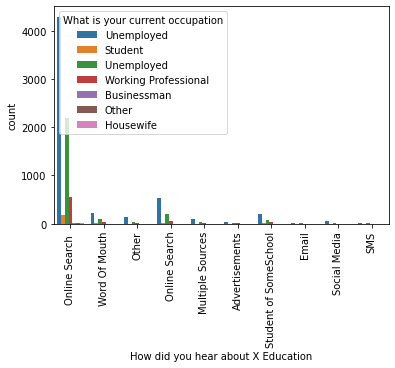

In [108]:
sns.countplot(x = "How did you hear about X Education", hue = "What is your current occupation", data = lead)
plt.xticks(rotation=90)
plt.show()

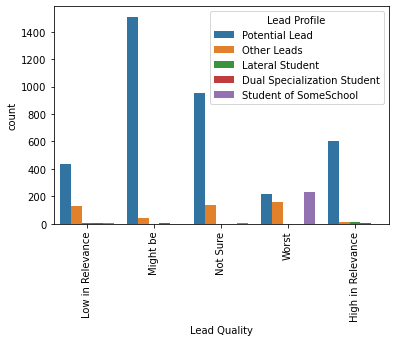

In [109]:
sns.countplot(x = "Lead Quality", hue = "Lead Profile", data = lead)
plt.xticks(rotation=90)
plt.show()

In [110]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,0,Potential Lead,Mumbai,No,No,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,0,Potential Lead,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Online Search,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,0,Potential Lead,Mumbai,No,No,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,No,Modified


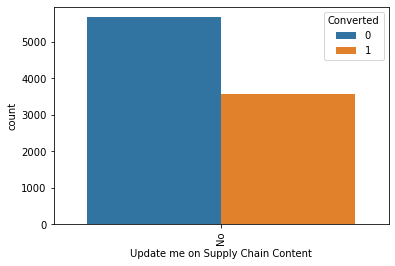

In [111]:
sns.countplot(x = "Update me on Supply Chain Content", hue = 'Converted', data = lead)
plt.xticks(rotation=90)
plt.show()

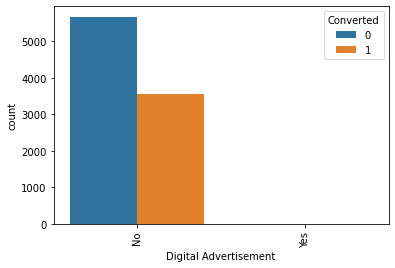

In [112]:
sns.countplot(x = "Digital Advertisement", hue = 'Converted', data = lead)
plt.xticks(rotation=90)
plt.show()

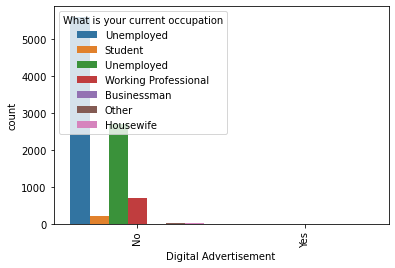

In [113]:
sns.countplot(x = "Digital Advertisement", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

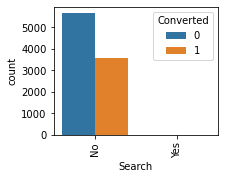

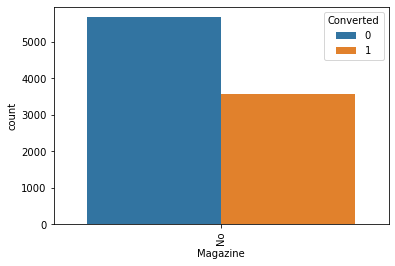

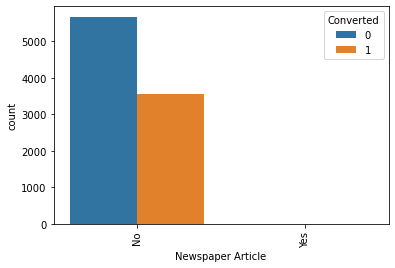

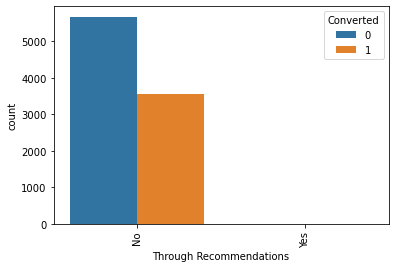

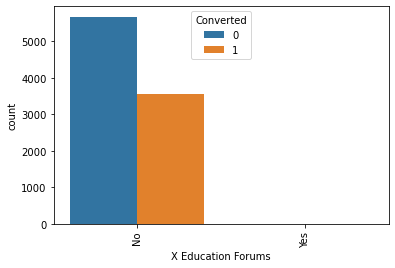

In [114]:
plt.figure(figsize=(10,8))
plt.subplot(3, 3, 3)

sns.countplot(x = "Search", hue = 'Converted', data = lead)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x = "Magazine", hue = 'Converted', data = lead)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x = "Newspaper Article", hue = 'Converted', data = lead)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x = "Through Recommendations", hue = 'Converted', data = lead)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x = "X Education Forums", hue = 'Converted', data = lead)
plt.xticks(rotation=90)
plt.show()

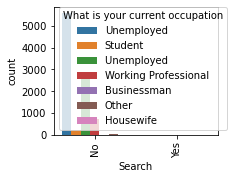

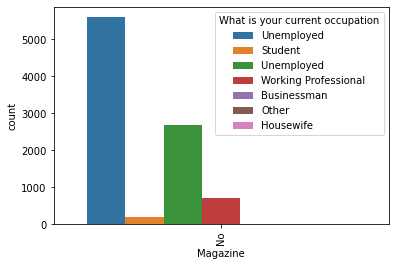

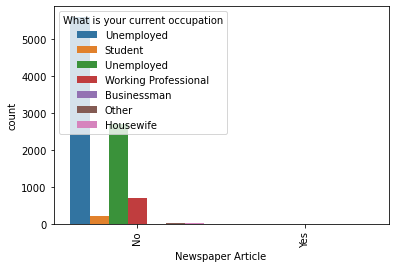

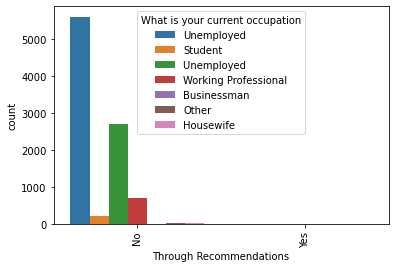

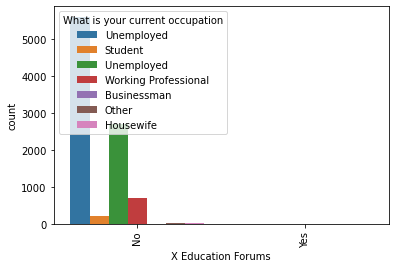

In [115]:
plt.figure(figsize=(10,8))
plt.subplot(3, 3, 3)

sns.countplot(x = "Search", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x = "Magazine", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x = "Newspaper Article", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x = "Through Recommendations", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x = "X Education Forums", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

In [116]:
# now look at the rest of missing values
round(lead.isnull().sum()/len(lead.index),2)*100

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                           0.0
Specialization                                    0.0
How did you hear about X Education                0.0
What is your current occupation                   0.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [117]:
# As we can see that its only 1% we can delete the rows containing null values and > 45%
lead.dropna(inplace= True)

In [118]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,0,Potential Lead,Mumbai,No,No,Modified
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Online Search,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,0,Potential Lead,Mumbai,No,No,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,No,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,0,Potential Lead,Mumbai,No,No,Modified


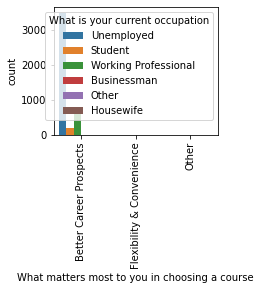

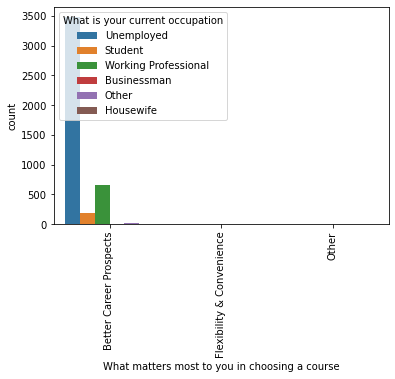

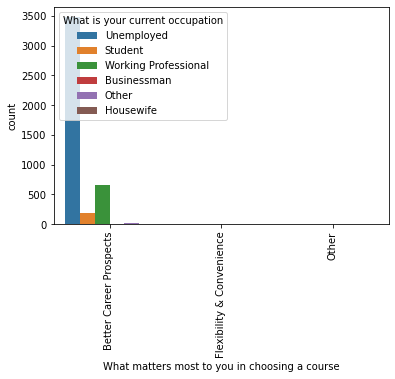

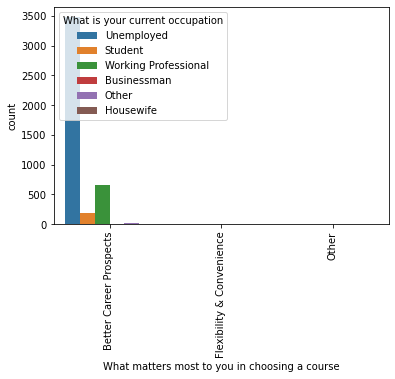

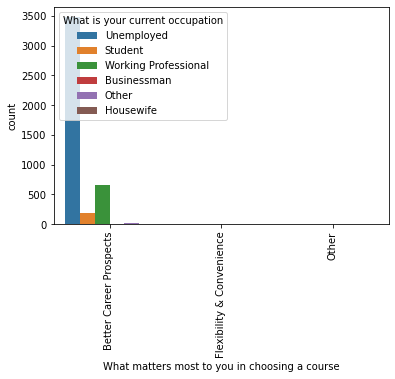

In [119]:
plt.figure(figsize=(10,8))
plt.subplot(3, 3, 3)

sns.countplot(x = "What matters most to you in choosing a course", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x = "What matters most to you in choosing a course", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x = "What matters most to you in choosing a course", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x = "What matters most to you in choosing a course", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x = "What matters most to you in choosing a course", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

In [120]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,0,Potential Lead,Mumbai,No,No,Modified
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Online Search,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,0,Potential Lead,Mumbai,No,No,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,No,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,0,Potential Lead,Mumbai,No,No,Modified


In [121]:
variables = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses']

In [122]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [123]:
lead[variables] = lead[variables].apply(binary_map)

In [124]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Online Search,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,No,0,Potential Lead,Mumbai,No,No,Modified
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Online Search,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,No,0,Potential Lead,Mumbai,No,No,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,No,No,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Low in Relevance,No,0,Potential Lead,Mumbai,No,No,Modified


In [125]:
convert = ['A free copy of Mastering The Interview','Update me on Supply Chain Content','I agree to pay the amount through cheque']


In [126]:
lead[convert] = lead[convert].apply(binary_map)

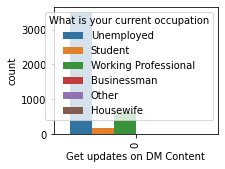

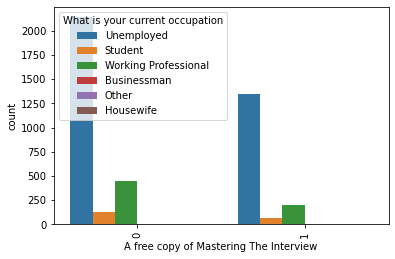

In [127]:
plt.figure(figsize=(10,8))
plt.subplot(3, 3, 3)

sns.countplot(x = "Get updates on DM Content", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()


sns.countplot(x = "A free copy of Mastering The Interview", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()


In [128]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Online Search,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Potential Lead,Mumbai,0,0,Modified
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Online Search,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Potential Lead,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,0,0,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Low in Relevance,0,0,Potential Lead,Mumbai,0,0,Modified


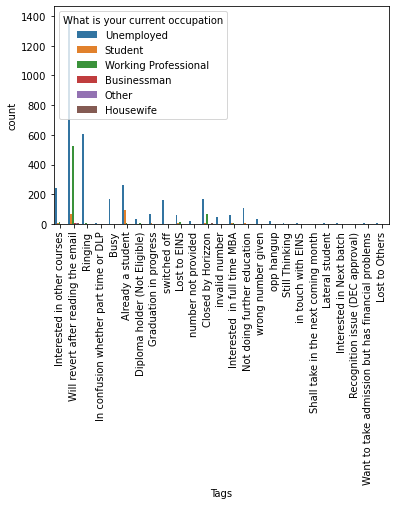

In [129]:
sns.countplot(x = "Tags", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

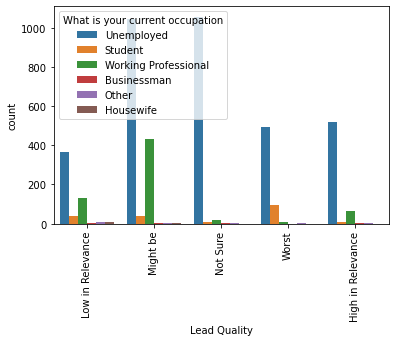

In [130]:
sns.countplot(x = "Lead Quality", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

In [131]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Online Search,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Potential Lead,Mumbai,0,0,Modified
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Online Search,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Potential Lead,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,0,0,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Low in Relevance,0,0,Potential Lead,Mumbai,0,0,Modified


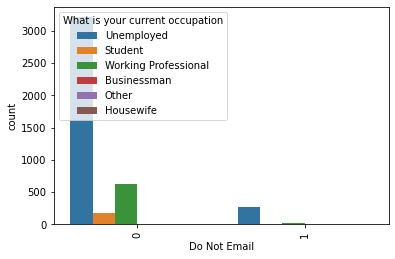

In [132]:
sns.countplot(x = "Do Not Email", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

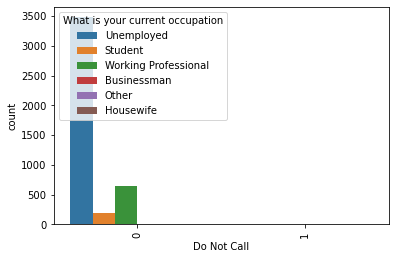

In [133]:
sns.countplot(x = "Do Not Call", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

In [134]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Online Search,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Potential Lead,Mumbai,0,0,Modified
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Online Search,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Potential Lead,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,0,0,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Low in Relevance,0,0,Potential Lead,Mumbai,0,0,Modified


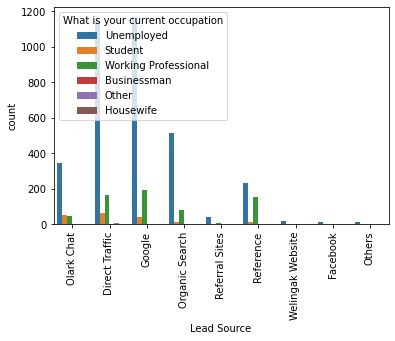

In [135]:
sns.countplot(x = "Lead Source", hue = 'What is your current occupation', data = lead)
plt.xticks(rotation=90)
plt.show()

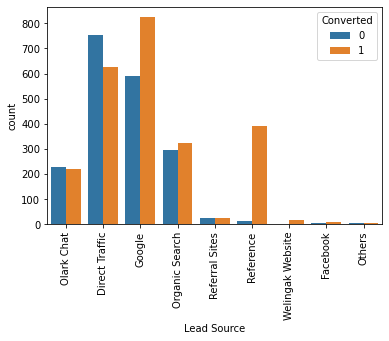

In [136]:
sns.countplot(x = "Lead Source", hue = 'Converted', data = lead)
plt.xticks(rotation=90)
plt.show()

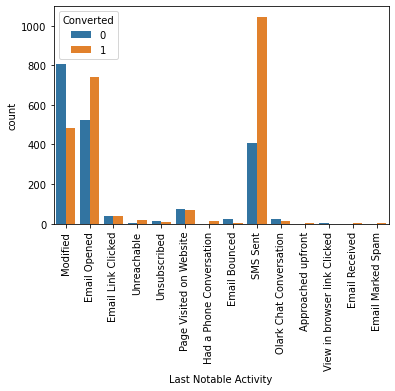

In [137]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
plt.xticks(rotation=90)
plt.show()

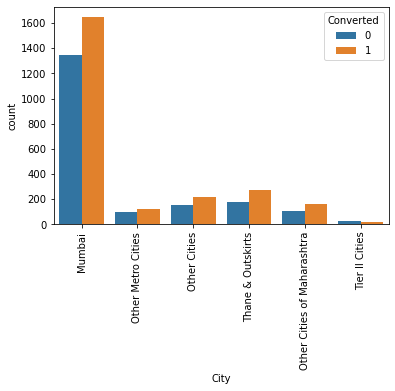

In [138]:
sns.countplot(x = "City", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

In [139]:
Conversion = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Conversion

56.06338998621957

In [140]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Online Search,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Potential Lead,Mumbai,0,0,Modified
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Online Search,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Potential Lead,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,0,0,Modified
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Low in Relevance,0,0,Potential Lead,Mumbai,0,0,Modified


#### Creating Dummy Variables for  Categorical Variables

In [141]:
dum_var = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation','Country','Tags','How did you hear about X Education','What matters most to you in choosing a course', 'City','Last Notable Activity', 'Lead Quality', 'Lead Profile' ]], drop_first=True)
dum_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kuwait,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profi

In [142]:
# Concat lead dataframe with dum_var
lead= pd.concat([lead, dum_var],axis=1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kuwait,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Citi

In [143]:
# dropping the original columns from which dummies are created
lead = lead.drop (['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation','Country','Tags','How did you hear about X Education','What matters most to you in choosing a course', 'City','Last Notable Activity', 'Lead Quality', 'Lead Profile' ], axis =1)

In [144]:
lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kuwait,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conver

###Model Preparation

### Test Train Splitting

In [145]:
from sklearn.model_selection import train_test_split
# Putting Target variable(Y)
y = lead['Converted']
y.head()

0    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [146]:
# X variable
X = lead.drop(['Converted'], axis =1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kuwait,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Las

In [147]:
# Splitting into test train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.7, test_size=0.3, random_state=100)

### Scaling

In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Country_Bahrain,Country_Bangladesh,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kuwait,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sweden,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Las

### Feature Selection with RFE

In [149]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(LR,n_features_to_select=20, step=1) # we can do 20 variable output initially
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False,  True,  True, False, False, False,  True, False, False,
       False,  True, False, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [150]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('Do Not Call', False, 132),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('Search', False, 103),
 ('Magazine', False, 129),
 ('Newspaper Article', False, 86),
 ('X Education Forums', False, 127),
 ('Newspaper', False, 69),
 ('Digital Advertisement', False, 97),
 ('Through Recommendations', False, 77),
 ('Receive More Updates About Our Courses', False, 130),
 ('Update me on Supply Chain Content', False, 131),
 ('Get updates on DM Content', False, 126),
 ('I agree to pay the amount through cheque', False, 133),
 ('A free copy of Mastering The Interview', False, 50),
 ('Lead Origin_Landing Page Submission', False, 102),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Source_Facebook', False, 88),
 ('Lead Source_Google', False, 89),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Others', False, 79),
 ('

In [151]:
# To view the columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Last Activity_SMS Sent', 'Country_Germany', 'Country_Qatar',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_number not provided',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Had a Phone Conversation', 'Lead Quality_Worst',
       'Lead Profile_Lateral Student'],
      dtype='object')

#### BUILDING THE MODEL

In [152]:
# Stats model, Model -1

In [153]:
import statsmodels.api as sm

In [154]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3026
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -413.04
Date:                Mon, 27 Feb 2023   Deviance:                       826.08
Time:                        19:42:56   Pearson chi2:                 2.77e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6687
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.0058      0.257    -11.708      0.000      -3.509      -2.503
Total Time Spent on Website                        0.9390      0.111      8.477      0.000       0.722       1.156
Lead Origin_Lead Add Form                          2.2183      1.932      1.148      0.251      -1.569       6.006
Lead Source_Olark Chat                             1.1131      0.346      3.218      0.001       0.435       1.791
Lead Source_Reference                             -0.1061      2.004     -0.053      0.958      -4.034       3.822
Last Activity_SMS Sent                             1.2825      0.218      5.881      0.000       0.855       1.710
Country_Germany                                   28.6799   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Country_Qatar                                     -3.3626      1.477     -2.276      0.023      -6.258      -0.468
Tags_Busy                                          2.4576      0.328      7.483      0.000       1.814       3.101
Tags_Closed by Horizzon                            7.5138      1.041      7.219      0.000       5.474       9.554
Tags_Interested in Next batch                     25.2819   6.36e+04      0.000      1.000   -1.25e+05    1.25e+05
Tags_Lateral student                              26.1785   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Tags_Lost to EINS                                  7.2007      1.104      6.520      0.000       5.036       9.365
Tags_Ringing                                      -1.1650      0.361     -3.231      0.001      -1.872      -0.458
Tags_Will revert after reading the email           5.4299      0.282     19.241      0.000       4.877       5.983
Tags_number not provided                         -22.3627   3.05e+04     -0.001      0.999   -5.97e+04    5.97e+04
Tags_switched off                                 -1.9994      0.767     -2.605      0.009      -3.503      -0.495
Tags_wrong number given                          -22.1504   2.51e+04     -0.001      0.999   -4.92e+04    4.92e+04
Last Notable Activity_Had a Phone Conversation    25.5051   3.53e+04      0.001      0.999   -6.91e+04    6.91e+04
Lead Quality_Worst                                -2.6123      0.678     -3.855      0.000      -3.940      -1.284
Lead Profile_Lateral Student                      25.1412   3.03e+04      0.001      0.999   -5.94e+04    5.94e+04
==================================================================================================================
"""

In [155]:
# Since the p-value of 'Tags_number not provided' is high we will drop this column
col1= cols.drop('Tags_number not provided')

###MODEL-2

In [156]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3027
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -414.64
Date:                Mon, 27 Feb 2023   Deviance:                       829.28
Time:                        19:42:56   Pearson chi2:                 2.75e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6684
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.0703      0.257    -11.928      0.000      -3.575      -2.566
Total Time Spent on Website                        0.9342      0.110      8.461      0.000       0.718       1.151
Lead Origin_Lead Add Form                          2.2445      1.957      1.147      0.252      -1.592       6.081
Lead Source_Olark Chat                             1.1103      0.346      3.213      0.001       0.433       1.787
Lead Source_Reference                             -0.1248      2.029     -0.061      0.951      -4.102       3.852
Last Activity_SMS Sent                             1.2528      0.216      5.793      0.000       0.829       1.677
Country_Germany                                   28.6605   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Country_Qatar                                     -3.3527      1.474     -2.274      0.023      -6.242      -0.463
Tags_Busy                                          2.5408      0.327      7.776      0.000       1.900       3.181
Tags_Closed by Horizzon                            7.5761      1.041      7.278      0.000       5.536       9.616
Tags_Interested in Next batch                     25.3762   6.36e+04      0.000      1.000   -1.25e+05    1.25e+05
Tags_Lateral student                              26.2721   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Tags_Lost to EINS                                  7.2403      1.102      6.573      0.000       5.081       9.399
Tags_Ringing                                      -1.0748      0.358     -3.002      0.003      -1.776      -0.373
Tags_Will revert after reading the email           5.5009      0.282     19.504      0.000       4.948       6.054
Tags_switched off                                 -1.9110      0.766     -2.494      0.013      -3.413      -0.409
Tags_wrong number given                          -22.0664   2.51e+04     -0.001      0.999   -4.93e+04    4.93e+04
Last Notable Activity_Had a Phone Conversation    25.5675   3.53e+04      0.001      0.999   -6.91e+04    6.92e+04
Lead Quality_Worst                                -2.5585      0.681     -3.757      0.000      -3.893      -1.224
Lead Profile_Lateral Student                      25.2107   3.04e+04      0.001      0.999   -5.96e+04    5.97e+04
==================================================================================================================
"""

In [157]:
# Checking for VIF of the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,16.46
3,Lead Source_Reference,15.96
13,Tags_Will revert after reading the email,2.00
4,Last Activity_SMS Sent,1.93
0,Total Time Spent on Website,1.49
2,Lead Source_Olark Chat,1.31
8,Tags_Closed by Horizzon,1.23
12,Tags_Ringing,1.19
7,Tags_Busy,1.09
17,Lead Quality_Worst,1.08


In [158]:
# Higher VIF for the var- Lead Origin_Lead Add Form, we need to drop this column
col1 = col1.drop('Lead Origin_Lead Add Form')

### MODEL-3 

In [159]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3028
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -415.61
Date:                Mon, 27 Feb 2023   Deviance:                       831.22
Time:                        19:42:56   Pearson chi2:                 2.76e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6681
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.0548      0.257    -11.907      0.000      -3.558      -2.552
Total Time Spent on Website                        0.9208      0.110      8.388      0.000       0.706       1.136
Lead Source_Olark Chat                             1.0815      0.345      3.133      0.002       0.405       1.758
Lead Source_Reference                              2.0823      0.591      3.525      0.000       0.924       3.240
Last Activity_SMS Sent                             1.2507      0.216      5.794      0.000       0.828       1.674
Country_Germany                                   28.6640   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Country_Qatar                                     -3.3727      1.474     -2.288      0.022      -6.262      -0.483
Tags_Busy                                          2.5280      0.326      7.759      0.000       1.889       3.167
Tags_Closed by Horizzon                            7.6048      1.041      7.308      0.000       5.565       9.644
Tags_Interested in Next batch                     25.3762   6.37e+04      0.000      1.000   -1.25e+05    1.25e+05
Tags_Lateral student                              26.2664   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Tags_Lost to EINS                                  7.2307      1.102      6.562      0.000       5.071       9.390
Tags_Ringing                                      -1.0798      0.357     -3.022      0.003      -1.780      -0.380
Tags_Will revert after reading the email           5.5106      0.282     19.555      0.000       4.958       6.063
Tags_switched off                                 -1.9171      0.766     -2.504      0.012      -3.418      -0.417
Tags_wrong number given                          -22.0775   2.52e+04     -0.001      0.999   -4.93e+04    4.93e+04
Last Notable Activity_Had a Phone Conversation    25.5449   3.53e+04      0.001      0.999   -6.92e+04    6.92e+04
Lead Quality_Worst                                -2.5629      0.681     -3.764      0.000      -3.897      -1.229
Lead Profile_Lateral Student                      25.1673   2.99e+04      0.001      0.999   -5.87e+04    5.87e+04
==================================================================================================================
"""

In [160]:
# p-value of Country_Germany is higher, we will drop it
col1= col1.drop('Country_Germany')


### MODEL-4 

In [161]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3029
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -419.49
Date:                Mon, 27 Feb 2023   Deviance:                       838.98
Time:                        19:42:56   Pearson chi2:                 2.77e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6673
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -3.0445      0.256    -11.896      0.000      -3.546      -2.543
Total Time Spent on Website                        0.9250      0.109      8.471      0.000       0.711       1.139
Lead Source_Olark Chat                             1.0827      0.344      3.146      0.002       0.408       1.757
Lead Source_Reference                              2.0873      0.590      3.538      0.000       0.931       3.244
Last Activity_SMS Sent                             1.2191      0.214      5.695      0.000       0.799       1.639
Country_Qatar                                     -3.3669      1.471     -2.289      0.022      -6.250      -0.484
Tags_Busy                                          2.5378      0.326      7.792      0.000       1.899       3.176
Tags_Closed by Horizzon                            7.5962      1.041      7.300      0.000       5.557       9.636
Tags_Interested in Next batch                     25.3945   6.36e+04      0.000      1.000   -1.25e+05    1.25e+05
Tags_Lateral student                              26.2892   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Tags_Lost to EINS                                  7.2257      1.102      6.557      0.000       5.066       9.386
Tags_Ringing                                      -1.0677      0.357     -2.991      0.003      -1.767      -0.368
Tags_Will revert after reading the email           5.5089      0.282     19.566      0.000       4.957       6.061
Tags_switched off                                 -1.4885      0.647     -2.302      0.021      -2.756      -0.221
Tags_wrong number given                          -22.0662   2.52e+04     -0.001      0.999   -4.93e+04    4.93e+04
Last Notable Activity_Had a Phone Conversation    25.5370   3.53e+04      0.001      0.999   -6.92e+04    6.92e+04
Lead Quality_Worst                                -2.5697      0.681     -3.776      0.000      -3.904      -1.236
Lead Profile_Lateral Student                      25.1588   2.99e+04      0.001      0.999   -5.86e+04    5.87e+04
==================================================================================================================
"""

In [162]:
# 'Tags_Interested in Next batch' has higher p value will drop the same
col1 = col1.drop('Tags_Interested in Next batch')

### MODEL -5

In [163]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3030
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -423.73
Date:                Mon, 27 Feb 2023   Deviance:                       847.45
Time:                        19:42:56   Pearson chi2:                 2.85e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6664
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.9475      0.245    -12.034      0.000      -3.428      -2.467
Total Time Spent on Website                        0.9383      0.108      8.694      0.000       0.727       1.150
Lead Source_Olark Chat                             1.0643      0.340      3.130      0.002       0.398       1.731
Lead Source_Reference                              2.2786      0.593      3.841      0.000       1.116       3.441
Last Activity_SMS Sent                             1.2909      0.213      6.061      0.000       0.873       1.708
Country_Qatar                                     -3.3836      1.478     -2.290      0.022      -6.280      -0.487
Tags_Busy                                          2.3975      0.316      7.596      0.000       1.779       3.016
Tags_Closed by Horizzon                            7.4652      1.036      7.204      0.000       5.434       9.496
Tags_Lateral student                              26.1356   9.26e+04      0.000      1.000   -1.82e+05    1.82e+05
Tags_Lost to EINS                                  7.1699      1.107      6.476      0.000       5.000       9.340
Tags_Ringing                                      -1.2272      0.347     -3.534      0.000      -1.908      -0.547
Tags_Will revert after reading the email           5.3886      0.270     19.931      0.000       4.859       5.918
Tags_switched off                                 -1.6419      0.642     -2.558      0.011      -2.900      -0.384
Tags_wrong number given                          -22.2109   2.51e+04     -0.001      0.999   -4.92e+04    4.91e+04
Last Notable Activity_Had a Phone Conversation    25.4391   3.51e+04      0.001      0.999   -6.88e+04    6.88e+04
Lead Quality_Worst                                -2.6560      0.673     -3.949      0.000      -3.974      -1.338
Lead Profile_Lateral Student                      25.0453   2.95e+04      0.001      0.999   -5.79e+04    5.79e+04
==================================================================================================================
"""

In [164]:
# 'Tags_Lateral student' has high p value will drop the same
col1= col1.drop('Tags_Lateral student')

#### MODEL-6

In [165]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm6.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3031
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -427.14
Date:                Mon, 27 Feb 2023   Deviance:                       854.28
Time:                        19:42:57   Pearson chi2:                 2.87e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6656
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.8944      0.240    -12.084      0.000      -3.364      -2.425
Total Time Spent on Website                        0.9345      0.108      8.691      0.000       0.724       1.145
Lead Source_Olark Chat                             1.1143      0.337      3.305      0.001       0.454       1.775
Lead Source_Reference                              2.2580      0.588      3.837      0.000       1.105       3.411
Last Activity_SMS Sent                             1.3367      0.213      6.286      0.000       0.920       1.753
Country_Qatar                                     -3.3895      1.482     -2.286      0.022      -6.295      -0.484
Tags_Busy                                          2.3118      0.311      7.441      0.000       1.703       2.921
Tags_Closed by Horizzon                            7.4104      1.035      7.159      0.000       5.382       9.439
Tags_Lost to EINS                                  7.1324      1.109      6.430      0.000       4.958       9.307
Tags_Ringing                                      -1.3180      0.343     -3.841      0.000      -1.990      -0.646
Tags_Will revert after reading the email           5.3197      0.265     20.060      0.000       4.800       5.839
Tags_switched off                                 -1.7276      0.640     -2.700      0.007      -2.982      -0.474
Tags_wrong number given                          -22.2947   2.51e+04     -0.001      0.999   -4.91e+04    4.91e+04
Last Notable Activity_Had a Phone Conversation    25.3819    3.5e+04      0.001      0.999   -6.87e+04    6.87e+04
Lead Quality_Worst                                -2.7123      0.667     -4.064      0.000      -4.020      -1.404
Lead Profile_Lateral Student                      24.9830   2.94e+04      0.001      0.999   -5.76e+04    5.77e+04
==================================================================================================================
"""

In [166]:
# P-value of column Tags_wrong number given column is higher will drop it
col1 = col1.drop('Tags_wrong number given')


#### MODEL-7

In [167]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm7.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3032
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -429.56
Date:                Mon, 27 Feb 2023   Deviance:                       859.12
Time:                        19:42:57   Pearson chi2:                 2.87e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6651
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.9881      0.239    -12.483      0.000      -3.457      -2.519
Total Time Spent on Website                        0.9374      0.107      8.732      0.000       0.727       1.148
Lead Source_Olark Chat                             1.1481      0.339      3.385      0.001       0.483       1.813
Lead Source_Reference                              2.2927      0.595      3.855      0.000       1.127       3.458
Last Activity_SMS Sent                             1.3044      0.211      6.190      0.000       0.891       1.717
Country_Qatar                                     -3.3775      1.479     -2.284      0.022      -6.276      -0.479
Tags_Busy                                          2.4236      0.308      7.874      0.000       1.820       3.027
Tags_Closed by Horizzon                            7.4973      1.035      7.243      0.000       5.469       9.526
Tags_Lost to EINS                                  7.1907      1.106      6.504      0.000       5.024       9.357
Tags_Ringing                                      -1.2033      0.339     -3.544      0.000      -1.869      -0.538
Tags_Will revert after reading the email           5.4165      0.264     20.499      0.000       4.899       5.934
Tags_switched off                                 -1.6136      0.638     -2.530      0.011      -2.864      -0.363
Last Notable Activity_Had a Phone Conversation    24.4775   2.13e+04      0.001      0.999   -4.17e+04    4.17e+04
Lead Quality_Worst                                -2.6522      0.671     -3.952      0.000      -3.968      -1.337
Lead Profile_Lateral Student                      24.0834   1.79e+04      0.001      0.999   -3.51e+04    3.51e+04
==================================================================================================================
"""

In [168]:
# p-value of column Last Notable Activity_Had a Phone Conversation is higher so will drop it
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

### MODEL-8

In [169]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3033
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -433.73
Date:                Mon, 27 Feb 2023   Deviance:                       867.46
Time:                        19:42:57   Pearson chi2:                 2.87e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6642
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9261      0.235    -12.460      0.000      -3.386      -2.466
Total Time Spent on Website                  0.9246      0.107      8.669      0.000       0.716       1.134
Lead Source_Olark Chat                       1.1118      0.337      3.300      0.001       0.451       1.772
Lead Source_Reference                        2.2561      0.592      3.814      0.000       1.097       3.415
Last Activity_SMS Sent                       1.2789      0.209      6.107      0.000       0.868       1.689
Country_Qatar                               -3.3841      1.477     -2.292      0.022      -6.278      -0.490
Tags_Busy                                    2.3796      0.305      7.808      0.000       1.782       2.977
Tags_Closed by Horizzon                      7.4422      1.034      7.197      0.000       5.415       9.469
Tags_Lost to EINS                            7.1532      1.107      6.460      0.000       4.983       9.324
Tags_Ringing                                -1.2360      0.337     -3.667      0.000      -1.897      -0.575
Tags_Will revert after reading the email     5.3780      0.261     20.632      0.000       4.867       5.889
Tags_switched off                           -1.6498      0.636     -2.593      0.010      -2.897      -0.403
Lead Quality_Worst                          -2.6884      0.668     -4.025      0.000      -3.998      -1.379
Lead Profile_Lateral Student                24.0224    1.8e+04      0.001      0.999   -3.52e+04    3.52e+04
============================================================================================================
"""

In [170]:
# p-value of Lead Profile_Lateral Student variable is higher will drop 
col1= col1.drop('Lead Profile_Lateral Student')

### MODEL-9

In [171]:
X_train_sm = sm.add_constant(X_train[col1])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm9.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3047
Model:                            GLM   Df Residuals:                     3034
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -437.86
Date:                Mon, 27 Feb 2023   Deviance:                       875.72
Time:                        19:42:57   Pearson chi2:                 2.87e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6633
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8661      0.230    -12.435      0.000      -3.318      -2.414
Total Time Spent on Website                  0.9108      0.106      8.590      0.000       0.703       1.119
Lead Source_Olark Chat                       1.0741      0.335      3.208      0.001       0.418       1.730
Lead Source_Reference                        2.2196      0.588      3.772      0.000       1.066       3.373
Last Activity_SMS Sent                       1.2539      0.208      6.024      0.000       0.846       1.662
Country_Qatar                               -3.3910      1.474     -2.300      0.021      -6.281      -0.501
Tags_Busy                                    2.3373      0.302      7.742      0.000       1.746       2.929
Tags_Closed by Horizzon                      7.4335      1.033      7.194      0.000       5.408       9.459
Tags_Lost to EINS                            7.1175      1.109      6.417      0.000       4.944       9.291
Tags_Ringing                                -1.2669      0.335     -3.786      0.000      -1.923      -0.611
Tags_Will revert after reading the email     5.3416      0.257     20.759      0.000       4.837       5.846
Tags_switched off                           -1.6842      0.635     -2.653      0.008      -2.928      -0.440
Lead Quality_Worst                          -2.7232      0.665     -4.094      0.000      -4.027      -1.420
============================================================================================================
"""

In [172]:
# Checking for VIF of the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,1.93
3,Last Activity_SMS Sent,1.88
2,Lead Source_Reference,1.54
0,Total Time Spent on Website,1.46
1,Lead Source_Olark Chat,1.31
6,Tags_Closed by Horizzon,1.19
8,Tags_Ringing,1.18
5,Tags_Busy,1.08
11,Lead Quality_Worst,1.08
10,Tags_switched off,1.05


#### Now the P-value and VIF is less and Model- 9 is our final model. there are 12 variables in the model

##### Prediction on Train set

In [173]:
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]


4584    0.994089
5617    0.931638
1095    0.009536
3166    0.962768
401     0.963207
7113    0.977324
4505    0.993379
7456    0.977350
4532    0.983751
7198    0.001549
dtype: float64

In [174]:
# To convert into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]



array([0.99408851, 0.93163833, 0.00953595, 0.96276827, 0.96320657,
       0.97732418, 0.99337932, 0.97735042, 0.98375091, 0.00154871])

In [175]:
# Creation of dataframe with actual and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,1,0.994089,4584
1,1,0.931638,5617
2,0,0.009536,1095
3,1,0.962768,3166
4,1,0.963207,401


In [176]:
# Choose an arbitrary cut off probability point of 0.5 and get the labels
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x :1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.994089,4584,1
1,1,0.931638,5617,1
2,0,0.009536,1095,0
3,1,0.962768,3166,1
4,1,0.963207,401,1


### CONFUSION MATRIX

In [177]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1293   75]
 [  65 1614]]


In [178]:
# This matrix can be explained as below table
# ACtual/pred  Not converted     Converted
# Not_COnverted  1293               75
# Converted        65             1614 

In [179]:
# Accuracy of model
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.9540531670495569


### Metrics Beyond Accuracy

In [180]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [181]:
# Lets see the sensitivity of our model
TP/ float(TP+FN )

0.9612864800476474

In [182]:
# Lets also see the specificity of our model
TN/ float(TN+FP)

0.9451754385964912

In [183]:
# To predict converted lead when the lead is not actually converted- FPR
print(FP/ float(TN+FP))

0.05482456140350877


In [184]:
# similarly positive predictive value
print(TP/ float(TP+FP))

0.955595026642984


In [185]:
# negative predictive value
print(TN/ float(TN+FN))

0.9521354933726067


#### PLOTTING OF ROC CURVE

In [186]:
# As we took cut off as 0.5 we are getting the sensitivity and specificity value as above, though ROC curve can give the accurate cut off, so lets plot the same
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [187]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

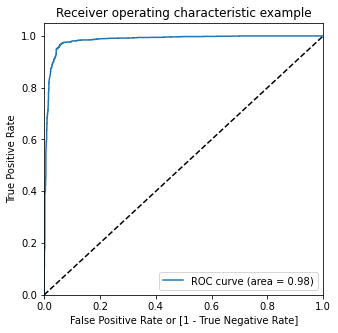

In [188]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [189]:
# ROC area 0.98 indicates a good model

### Find the Optimal Cut off Point

In [190]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.994089,4584,1,1,1,1,1,1,1,1,1,1,1
1,1,0.931638,5617,1,1,1,1,1,1,1,1,1,1,1
2,0,0.009536,1095,0,1,0,0,0,0,0,0,0,0,0
3,1,0.962768,3166,1,1,1,1,1,1,1,1,1,1,1
4,1,0.963207,401,1,1,1,1,1,1,1,1,1,1,1


In [191]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.551034  1.000000  0.000000
0.1   0.1  0.922875  0.984515  0.847222
0.2   0.2  0.946177  0.976772  0.908626
0.3   0.3  0.955366  0.973198  0.933480
0.4   0.4  0.955038  0.969029  0.937865
0.5   0.5  0.954053  0.961286  0.945175
0.6   0.6  0.952412  0.951757  0.953216
0.7   0.7  0.951428  0.946992  0.956871
0.8   0.8  0.948146  0.941036  0.956871
0.9   0.9  0.918937  0.871948  0.976608


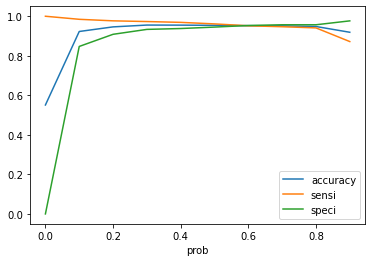

In [192]:
# let's plot accuracy sensitivity and specificity of the probabilities listed above
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From this curve probability is 0.6 as cut off probability

In [239]:
# will predict using 0.6 as cut off
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x :1 if x > 0.6 else 0)
y_train_pred_final.head(20)

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.994089,4584,1,1,1,1,1,1,1,1,1,1,1
1,1,0.931638,5617,1,1,1,1,1,1,1,1,1,1,1
2,0,0.009536,1095,0,1,0,0,0,0,0,0,0,0,0
3,1,0.962768,3166,1,1,1,1,1,1,1,1,1,1,1
4,1,0.963207,401,1,1,1,1,1,1,1,1,1,1,1
5,1,0.977324,7113,1,1,1,1,1,1,1,1,1,1,1
6,1,0.993379,4505,1,1,1,1,1,1,1,1,1,1,1
7,1,0.977350,7456,1,1,1,1,1,1,1,1,1,1,1
8,1,0.983751,4532,1,1,1,1,1,1,1,1,1,1,1
9,0,0.001549,7198,0,1,0,0,0,0,0,0,0,0,0


In [194]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9524122087298983

In [195]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion2)

[[1304   64]
 [  81 1598]]


In [196]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [197]:
# Lets see the sensitivity of our model
TP/ float(TP+FN )

0.9612864800476474

In [198]:
# Lets also see the specificity of our model
TN/ float(TN+FP)

0.9451754385964912

In [199]:
# To predict converted lead when the lead is not actually converted- FPR
print(FP/ float(TN+FP))

0.05482456140350877


In [200]:
# similarly positive predictive value
print(TP/ float(TP+FP))

0.955595026642984


In [201]:
# negative predictive value
print(TN/ float(TN+FN))

0.9521354933726067


#### PRESCISION AND RECALL

#### Precision = TP/TP+FP

In [202]:
confusion[1,1]/(confusion[1,1]+confusion[0,1])

0.955595026642984

#### Recall = TP/TP+FN

In [203]:
confusion[1,1]/(confusion[1,1]+confusion[1,0])

0.9612864800476474

In [204]:
#Using Sklearn utilities for the same

In [205]:
from sklearn.metrics import precision_score, recall_score

In [206]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9614921780986763

In [207]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9517569982132221

### Precision and Recall trade off

In [208]:
from sklearn.metrics import precision_recall_curve

In [209]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       1
 2       0
 3       1
 4       1
        ..
 3042    1
 3043    1
 3044    1
 3045    1
 3046    1
 Name: Converted, Length: 3047, dtype: int64,
 0       1
 1       1
 2       0
 3       1
 4       1
        ..
 3042    1
 3043    1
 3044    1
 3045    1
 3046    1
 Name: predicted, Length: 3047, dtype: int64)

In [210]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

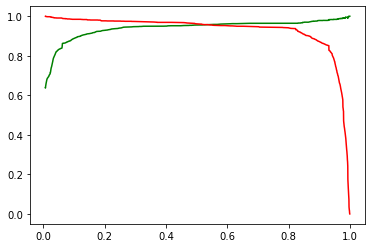

In [211]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### PREDICTION ON TEST SET

In [212]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [213]:
col1

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Last Activity_SMS Sent', 'Country_Qatar',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Quality_Worst'],
      dtype='object')

In [214]:
X_test_result =X_test[col1]


In [215]:
# Adding constant
X_test_result = sm.add_constant(X_test_result)

In [216]:
y_test_pred = result.predict(X_test_result)
y_test_pred[:10]

4123    0.999832
4216    0.997127
8905    0.004267
7971    0.031625
964     0.981163
6842    0.997840
5991    0.952092
1447    0.986143
2456    0.002886
2629    0.977194
dtype: float64

#### MODEL EVALUATION

Text(0, 0.5, 'y_test_pred')

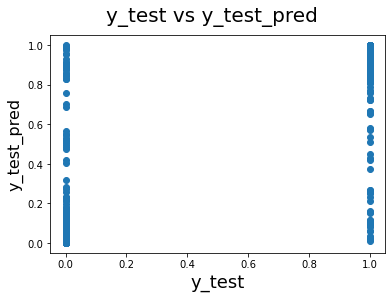

In [217]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)          # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

In [218]:
# R^2 Score Verification
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.8547901870227594

In [219]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4123,0.999832
4216,0.997127
8905,0.004267
7971,0.031625
964,0.981163


In [220]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [221]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [222]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [223]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [224]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4123,0.999832
1,1,4216,0.997127
2,0,8905,0.004267
3,0,7971,0.031625
4,1,964,0.981163


In [225]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [226]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4123,1,0.999832
1,4216,1,0.997127
2,8905,0,0.004267
3,7971,0,0.031625
4,964,1,0.981163


In [227]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4123,1,0.999832,1
1,4216,1,0.997127,1
2,8905,0,0.004267,0
3,7971,0,0.031625,0
4,964,1,0.981163,1


In [228]:
# To assign lead score to test data
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4123,1,0.999832,1,100
1,4216,1,0.997127,1,100
2,8905,0,0.004267,0,0
3,7971,0,0.031625,0,3
4,964,1,0.981163,1,98


In [229]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9556235654169855

In [230]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[510,  35],
       [ 23, 739]], dtype=int64)

In [231]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [232]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9698162729658792

In [233]:
# Let us calculate specificity
TN / float(TN+FP)

0.9357798165137615

### OBSERVATIONS

In [234]:
# We get the following metrics on test data
# Accuracy 95%
# Specificity 93%
# Sensitivity 96%

#### COMPARING THE METRICS OF TEST AND TRAIN SET

In [235]:
# TRAIN DATA
# Accuracy 95%
# Specificity 94%
# Sensitivity 96%

#### Thus our model seems to satisfy CEO's requirement with conversion rate around 95%. 

In [236]:
# The leads to be contacted most for conversion(HOT LEADS)
hot_leads = y_pred_final.loc [y_pred_final['Lead_Score']>=85]
hot_leads

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4123,1,0.999832,1,100
1,4216,1,0.997127,1,100
4,964,1,0.981163,1,98
5,6842,1,0.997840,1,100
6,5991,1,0.952092,1,95
...,...,...,...,...,...
1302,2051,0,0.857925,1,86
1303,2568,1,0.996441,1,100
1304,3441,1,0.931638,1,93
1305,534,0,0.988313,1,99


### There are 1306 leads which can be sureshot for conversion, lets find their corresponding prospect ID

In [237]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([4123, 4216,  964, 6842, 5991, 1447, 2629, 9205, 7387, 1826, 4992,
       4347, 8050, 4415,  576,  659, 7245, 1766,  760, 8348, 4635,  353,
       7187, 8164, 2533, 1704, 2043, 8617,  370, 5803, 6829, 8375, 4185,
        240, 8077, 3608, 7085,   37, 2266, 1805, 4002, 5662,  889, 8730,
       1771,  582, 8840, 1148, 5258, 5137, 3187, 1994, 2390, 1223, 5639,
       4963, 2361, 6996, 6651, 1927, 6784, 7234, 8325, 2600, 7496, 7121,
       4477, 1761, 7883, 2692, 9126, 6621, 8076, 3847, 5992, 4974, 5656,
       7952, 2783, 8816, 3652, 4337, 9192, 6968, 2405, 8722, 8895, 5818,
       1193, 4977, 4352, 1594, 6624, 5561, 7772,  727, 2632, 5785, 1570,
       1300, 2967, 5826, 8409, 5815, 4724, 6501,  216, 2016, 5395, 4473,
       1869, 1829, 4772, 6663, 1257, 4782, 9100, 4112, 3426, 4540, 9231,
       9115, 1056, 4359, 5812, 1957, 6027,  693, 4676, 6730, 1605, 5790,
       4091, 3439, 5413, 8729, 8539, 8999, 3664, 7636, 2157, 1591, 7346,
        838,  713, 4426, 2360, 7552, 7076, 3976, 54

### MOST IMPORTANT FEATURES AS PER OUR MODEL

In [238]:
result.params.sort_values(ascending=False)

Tags_Closed by Horizzon                     7.433538
Tags_Lost to EINS                           7.117539
Tags_Will revert after reading the email    5.341630
Tags_Busy                                   2.337324
Lead Source_Reference                       2.219644
Last Activity_SMS Sent                      1.253903
Lead Source_Olark Chat                      1.074105
Total Time Spent on Website                 0.910839
Tags_Ringing                               -1.266866
Tags_switched off                          -1.684158
Lead Quality_Worst                         -2.723166
const                                      -2.866069
Country_Qatar                              -3.391048
dtype: float64

##### The company can make calls to Tags closed by Horizon , Lost to EINS and Will revert after reading mail. Also concentrate on reference of lead source and Olark chart. ANd finally Last activity sms sent and total time spent on website.

#### The company cannot make calls or spend time on Tags ringing & switched off, lead quality worst& Qatar residents